# O Objetivo aqui é explorar os dados de filmes Brasileiros e Internacionais exibidos entre 2009 e 2017
Com base nos dados da Ancine(www.oca.ancine.gov.br) vamos explorar os filmes exibidos no Brasil

In [1]:
# Importando bibliotecas
import pandas as pd
%matplotlib inline

In [2]:
# Criar o DataFrame com base em um arquivo XLSX
# Precisamos pular as 2 primeiras linhas e as 16 ultimas, visto que através de análise na abertura do arquivo as consederei como dados descartáveis
df = pd.read_excel('ancine.xlsx', skiprows = 2, skipfooter = 16)

# Exibindo os 5 primeiros resultados
df.head()

Ano de exibição                      Título da obra        Gênero  \
0             2017                          #Screamers        Ficção   
1             2017  10 Centavos para o Número da Besta  Documentário   
2             2017           120 batimentos por minuto        Ficção   
3             2017                          13 Minutos        Ficção   
4             2017                      150 Miligramas        Ficção   

  País(es) produtor(es) da obra Nacionalidade da obra   Data de lançamento  \
0                Estados Unidos          Estrangeiros  2017-11-30 00:00:00   
1                        Brasil           Brasileiros  2017-11-28 00:00:00   
2                        França          Estrangeiros  2018-01-04 00:00:00   
3                      Alemanha          Estrangeiros  2016-11-03 00:00:00   
4                        França          Estrangeiros  2017-08-31 00:00:00   

         Distribuidora Origem da empresa distribuidora  \
0       Cineart Filmes           Distribuição Nacional   
1  Ponto de Equilíbrio           Distribuição Nacional   
2           Imovision            Distribuição Nacional   
3    Alphaville Filmes           Distribuição Nacional   
4          Califórnia            Distribuição Nacional   

   Público no ano de exibição  Renda (R$) no ano de exibição  
0                         714                        9437.45  
1                           7                          63.00  
2                         262                        3791.63  
3                         620                        6463.50  
4                         771                       10508.71

In [3]:
# Exibindo os últimos resultados
df.tail()

Ano de exibição                   Título da obra        Gênero  \
5686             2009         X-Men Origens: Wolverine        Ficção   
5687             2009  Xuxa em o Mistério de Feiurinha        Ficção   
5688             2009          Xuxa em Sonho de Menina        Ficção   
5689             2009                      Xuxa Gêmeas        Ficção   
5690             2009                     Zico na Rede  Documentário   

     País(es) produtor(es) da obra Nacionalidade da obra   Data de lançamento  \
5686                Estados Unidos          Estrangeiros  2009-05-01 00:00:00   
5687                        Brasil           Brasileiros  2009-12-25 00:00:00   
5688                        Brasil           Brasileiros  2007-12-21 00:00:00   
5689                        Brasil           Brasileiros  2006-12-15 00:00:00   
5690                        Brasil           Brasileiros  2009-07-03 00:00:00   

         Distribuidora Origem da empresa distribuidora  \
5686               Fox      Distribuição Internacional   
5687          Playarte           Distribuição Nacional   
5688            Warner      Distribuição Internacional   
5689               Fox      Distribuição Internacional   
5690  Business Telecom           Distribuição Nacional   

      Público no ano de exibição  Renda (R$) no ano de exibição  
5686                     3199434                    27352313.00  
5687                      250109                     1766416.65  
5688                        8914                       26880.00  
5689                        1671                        5013.00  
5690                         546                        2529.50

In [4]:
# Verificando os tipos de dados das colunas
df.dtypes

Ano de exibição                      int64
Título da obra                      object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição           int64
Renda (R$) no ano de exibição      float64
dtype: object

In [5]:
# Analisando os dados, vemos que Data de lançamento é um object e nesse caso queriamos que fosse um datetime
# Sendo assim vamos tentar converter o campo para um datetime
df['Data de lançamento'] = pd.to_datetime(df['Data de lançamento'])

TypeError: invalid string coercion to datetime

In [7]:
# Quando rodamos o comando acima temos um erro interessante de se analisar
# Vemos que ao final do TraceBack temos o seguinte erro TypeError: invalid string coercion to datetime
# Isso está nos dizendo que existem informações nesse campo que não podem ser convertidos em datetime
# Vamos tentar identificar utilizando o value_counts

In [8]:
# Identificando os dados existentes na coluna Data de lançamento
df['Data de lançamento'].value_counts()

Relançamento           175
2012-12-21 00:00:00     33
2015-12-03 00:00:00     33
2013-11-29 00:00:00     29
2012-11-02 00:00:00     27
2015-11-19 00:00:00     25
2015-11-12 00:00:00     25
2013-11-01 00:00:00     23
2013-12-06 00:00:00     23
2016-11-17 00:00:00     23
2013-10-11 00:00:00     23
2011-12-02 00:00:00     21
2014-11-06 00:00:00     21
2013-09-13 00:00:00     21
2011-11-11 00:00:00     21
2009-12-11 00:00:00     20
2014-06-19 00:00:00     19
2016-11-10 00:00:00     19
2011-12-09 00:00:00     19
2011-09-30 00:00:00     19
2013-12-20 00:00:00     19
2015-11-26 00:00:00     18
2015-12-10 00:00:00     18
2014-12-04 00:00:00     18
2012-10-12 00:00:00     18
2015-08-20 00:00:00     18
2016-11-24 00:00:00     18
2011-11-25 00:00:00     18
2016-12-01 00:00:00     18
2013-09-06 00:00:00     18
                      ... 
2014-11-24 00:00:00      1
2018-11-29 00:00:00      1
2007-11-02 00:00:00      1
2009-03-14 00:00:00      1
2011-07-02 00:00:00      1
2016-07-25 00:00:00      1
2

In [10]:
# Show de bola, com isso conseguimos um dado importante que é consta na primeira linha do resultado
# Conforme podemos ver, existem 175 linhas no campo Data de lançamento que é um texto 'Relançamento''
# Dessa forma fica impossivel ao pandas converter um texto em datetime, nesse ponto devemos tomar uma decisão
# A minha nesse momento será por remover esse campo do meu DataFrame criando um novo apartir do já exisitente

In [11]:
df_new = df[df['Data de lançamento'] != 'Relançamento'].copy()

In [12]:
# Vamos verificar os tipos das colunas do novo DataFrame
df_new.dtypes

Ano de exibição                      int64
Título da obra                      object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição           int64
Renda (R$) no ano de exibição      float64
dtype: object

In [14]:
# Agora vamos tentar converter novamente o campo Data de lançamento para datetime
df_new['Data de lançamento'] = pd.to_datetime(df_new['Data de lançamento'])

In [15]:
df_new.dtypes

Ano de exibição                             int64
Título da obra                             object
Gênero                                     object
País(es) produtor(es) da obra              object
Nacionalidade da obra                      object
Data de lançamento                 datetime64[ns]
Distribuidora                              object
Origem da empresa distribuidora            object
Público no ano de exibição                  int64
Renda (R$) no ano de exibição             float64
dtype: object

In [16]:
# Agora sim conseguimos fazer a conversão

In [20]:
# Quantos filmes foram lançados por ano?
df_new['Data de lançamento'].dt.year.value_counts()

2013    669
2015    646
2014    619
2016    613
2011    553
2012    539
2009    503
2017    487
2010    475
2008    225
2007     61
2006     49
2005     29
2018     17
2004     10
2002      6
2001      5
2003      4
1999      3
2000      2
1998      1
Name: Data de lançamento, dtype: int64

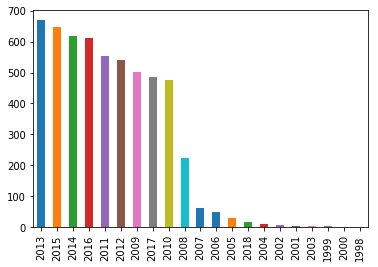

In [21]:
# Plotando as informações em gráfico
df_new['Data de lançamento'].dt.year.value_counts().plot.bar()

In [22]:
# Qual o filme com maior bilheteria?
df_new[df_new['Renda (R$) no ano de exibição'] ==  df_new['Renda (R$) no ano de exibição'].max()]

Ano de exibição               Título da obra  Gênero  \
2249             2015  Vingadores: A Era de Ultron  Ficção   

     País(es) produtor(es) da obra Nacionalidade da obra Data de lançamento  \
2249                Estados Unidos          Estrangeiros         2015-04-23   

     Distribuidora Origem da empresa distribuidora  \
2249        Disney      Distribuição Internacional   

      Público no ano de exibição  Renda (R$) no ano de exibição  
2249                    10129071                    146184931.0

In [23]:
# Qual o filme com menor bilheteria?
df_new[df_new['Renda (R$) no ano de exibição'] ==  df_new['Renda (R$) no ano de exibição'].min()]

Ano de exibição                                     Título da obra  \
2277             2014                              A Batalha do passinho   
2608             2014                                          Mar negro   
2728             2014                           O Último Lance do Leilão   
3041             2013                                  As horas vulgares   
3058             2013                                 Beije-me outra vez   
3105             2013                                        Crazy Horse   
3390             2013                                     Quase um tango   
3459             2013                                      Todos os Dias   
3603             2012                                   Apenas entre Nós   
3627             2012                                   Ataque ao prédio   
3665             2012                 Clementina de Jesus - Rainha Quelé   
3787             2012                                       Luto em Luta   
3815             2012                                Movimento Browniano   
3829             2012                                           O abrigo   
3920             2012                                          Ponto Org   
4085             2011                          A Última Estrada da Praia   
4462             2011                                  Poema de Salvação   
4466             2011          Porta a porta – A política em dois tempos   
4587             2011                                           Walachai   
4732             2010              Cine Cocoricó: As Aventuras na Cidade   
4853             2010                                      Luto Como Mãe   
5022             2010              Simonal - Ninguém Sabe o Duro que Dei   
5203             2009                                  As Chaves de Casa   
5463             2009  Naufrágio - Mistério e Morte na Catástrofe do ...   
5591             2009                                           Santiago   
5666             2009                                  Vamos Subir, Leão   

            Gênero       País(es) produtor(es) da obra Nacionalidade da obra  \
2277  Documentário                              Brasil           Brasileiros   
2608        Ficção                              Brasil           Brasileiros   
2728        Ficção                              Brasil           Brasileiros   
3041        Ficção                              Brasil           Brasileiros   
3058        Ficção                              Itália          Estrangeiros   
3105        Ficção                      Estados Unidos          Estrangeiros   
3390        Ficção                              Brasil           Brasileiros   
3459        Ficção                         Reino Unido          Estrangeiros   
3603        Ficção  França, Eslovênia, Sérvia, Croácia          Estrangeiros   
3627        Ficção                         Reino Unido          Estrangeiros   
3665  Documentário                              Brasil           Brasileiros   
3787  Documentário                              Brasil           Brasileiros   
3815        Ficção                             Holanda          Estrangeiros   
3829        Ficção                      Estados Unidos          Estrangeiros   
3920        Ficção                              Brasil           Brasileiros   
4085        Ficção                              Brasil           Brasileiros   
4462        Ficção                           Argentina          Estrangeiros   
4466  Documentário                              Brasil           Brasileiros   
4587  Documentário                              Brasil           Brasileiros   
4732        Ficção                              Brasil           Brasileiros   
4853  Documentário                              Brasil           Brasileiros   
5022  Documentário                              Brasil           Brasileiros   
5203        Ficção                              Itália          Estrangeiros   
5463  Documentário               

In [28]:
# Para os casos acima tambem poderiamos ter utilizado o nlargest e o smallest
df_new.nlargest(3, 'Renda (R$) no ano de exibição')

Ano de exibição                 Título da obra  Gênero  \
2249             2015    Vingadores: A Era de Ultron  Ficção   
893              2016  Capitão América: Guerra civil  Ficção   
2242             2015           Velozes e Furiosos 7  Ficção   

     País(es) produtor(es) da obra Nacionalidade da obra Data de lançamento  \
2249                Estados Unidos          Estrangeiros         2015-04-23   
893                 Estados Unidos          Estrangeiros         2016-04-28   
2242                Estados Unidos          Estrangeiros         2015-04-02   

     Distribuidora Origem da empresa distribuidora  \
2249        Disney      Distribuição Internacional   
893         Disney      Distribuição Internacional   
2242     Universal      Distribuição Internacional   

      Público no ano de exibição  Renda (R$) no ano de exibição  
2249                    10129071                   1.461849e+08  
893                      9617572                   1.433370e+08  
2242                     9857946                   1.424659e+08

In [29]:
df_new.nsmallest(3, 'Renda (R$) no ano de exibição')

Ano de exibição            Título da obra        Gênero  \
2277             2014     A Batalha do passinho  Documentário   
2608             2014                 Mar negro        Ficção   
2728             2014  O Último Lance do Leilão        Ficção   

     País(es) produtor(es) da obra Nacionalidade da obra Data de lançamento  \
2277                        Brasil           Brasileiros         2013-10-11   
2608                        Brasil           Brasileiros         2014-01-17   
2728                        Brasil           Brasileiros         2014-05-01   

           Distribuidora Origem da empresa distribuidora  \
2277   Cine Santa Teresa           Distribuição Nacional   
2608             Petrini           Distribuição Nacional   
2728  Sam Rádio Pictures           Distribuição Nacional   

      Público no ano de exibição  Renda (R$) no ano de exibição  
2277                         355                            0.0  
2608                           0                            0.0  
2728                           0                            0.0

In [30]:
# Quantos filmes nacionais e estrangeiros?
df_new['Nacionalidade da obra'].value_counts()

Estrangeiros    3902
Brasileiros     1614
Name: Nacionalidade da obra, dtype: int64